In [12]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from label_lines import *

%matplotlib inline

In [2]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import scipy.special as spsp
import scipy.misc as spm
import scipy.optimize as spo
import numpy.linalg as npl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline
import sympy as sym
import time
import seaborn as sns
import seaborn.distributions as snsd
import math as math
sns.set(style="ticks");
plt.ioff() # turn off interactive plotting
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
plt.rc('axes', labelsize=22)
plt.rc('legend', fontsize=22)
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True
npr.seed(1)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
np.random.seed(1234)

#Random walk MH

Convex distribution as target

In [9]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
naccept = 0
theta = 0.1
niters = 10000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_p = theta + st.norm(0, sigma).rvs()
    rho = min(1, target.pdf(theta_p)/target.pdf(theta))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
    if np.mod(i,niters/10)==0:
        print "Iteration", i, "Acceptance", naccept/niters
nmcmc = len(samples)//2
print "Iteration", niters, "Acceptance", naccept/niters

Iteration 0 Acceptance 0.0001
Iteration 1000 Acceptance 0.0408
Iteration 2000 Acceptance 0.0779
Iteration 3000 Acceptance 0.1163
Iteration 4000 Acceptance 0.1562
Iteration 5000 Acceptance 0.1955
Iteration 6000 Acceptance 0.235
Iteration 7000 Acceptance 0.2772
Iteration 8000 Acceptance 0.316
Iteration 9000 Acceptance 0.3553
Iteration 10000 Acceptance 0.3968


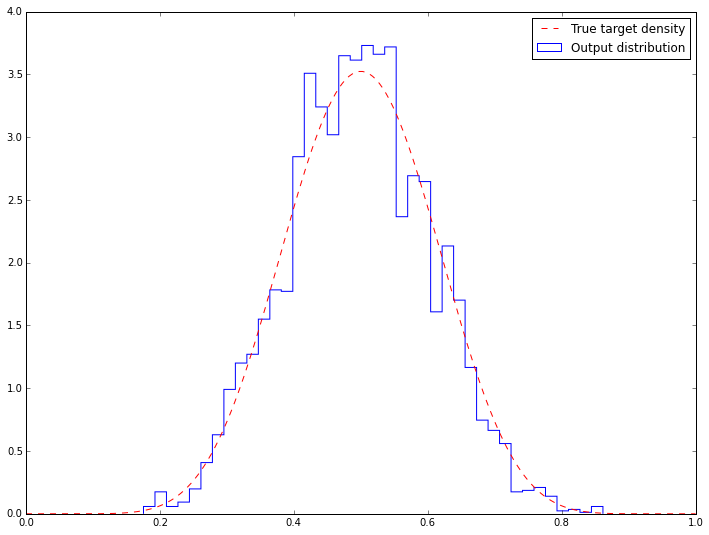

In [10]:
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Output distribution');
plt.plot(thetas, target.pdf(thetas), c='red', linestyle='--', label='True target density')
plt.xlim([0,1]);
plt.legend(loc='best');

Concave distribution as target (Beta)

In [17]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
naccept = 0
theta = 0.1
niters = 10000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_p = theta + st.norm(0, sigma).rvs()
    rho = min(1, target.pdf(theta_p)/target.pdf(theta))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
    if np.mod(i,niters/10)==0:
        print "Iteration", i, "Acceptance", naccept/niters
nmcmc = len(samples)//2
print "Iteration", niters, "Acceptance", naccept/niters
S_ref=samples

Iteration 0 Acceptance 0.0001
Iteration 1000 Acceptance 0.0403
Iteration 2000 Acceptance 0.0812
Iteration 3000 Acceptance 0.1201
Iteration 4000 Acceptance 0.1603
Iteration 5000 Acceptance 0.2005
Iteration 6000 Acceptance 0.2417
Iteration 7000 Acceptance 0.2809
Iteration 8000 Acceptance 0.3223
Iteration 9000 Acceptance 0.3648
Iteration 10000 Acceptance 0.4052


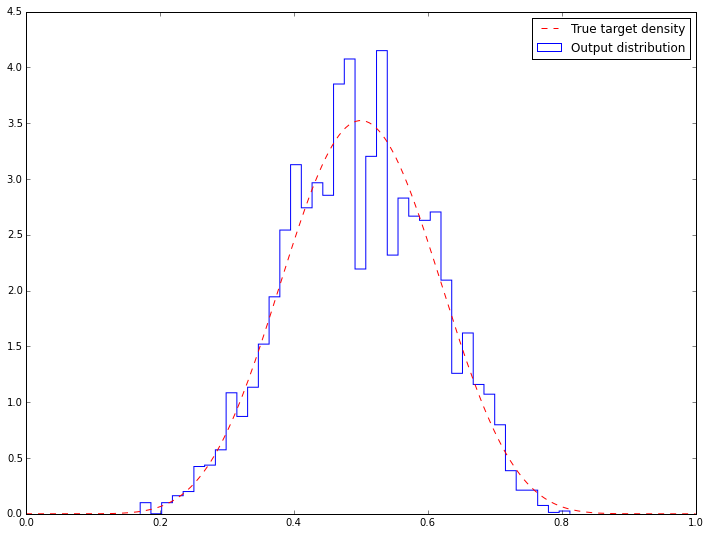

In [11]:
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Output distribution');
plt.plot(thetas, target.pdf(thetas), c='red', linestyle='--', label='True target density')
plt.xlim([0,1]);
plt.legend(loc='best');

#MALA

In [37]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
naccept = 0
theta = 0.1
niters = 20000

delta = 0.01
gamma = 0.01


samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_1 = theta
    theta_2 = theta_1 + delta
    gradU = -(target.pdf(theta_2) - target.pdf(theta_1))/delta #numeric estimation of the numerical gradient
    theta_p = theta +gamma*gradU + st.norm(0, np.sqrt(2*gamma)).rvs()
    rho = min(1, target.pdf(theta_p)*st.norm(0,np.sqrt(2*gamma)).pdf(theta)/[st.norm(0,np.sqrt(2*gamma)).pdf(theta_p)*target.pdf(theta)])
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
    if np.mod(i,niters/10)==0:
        print "Iteration", i, "Acceptance", naccept/niters
nmcmc = len(samples)//2
print "Iteration", niters, "Acceptance", naccept/niters
S=samples

Iteration 0 Acceptance 5e-05
Iteration 2000 Acceptance 0.0462
Iteration 4000 Acceptance 0.09195
Iteration 6000 Acceptance 0.1371
Iteration 8000 Acceptance 0.18485
Iteration 10000 Acceptance 0.2326
Iteration 12000 Acceptance 0.27855
Iteration 14000 Acceptance 0.3237
Iteration 16000 Acceptance 0.3718
Iteration 18000 Acceptance 0.4172
Iteration 20000 Acceptance 0.4648


In [27]:
def plotResults(S, ns, weights="doesNotMatter", figId="basic"):  
    # Plot the joint
    m = np.min(S)
    M = np.max(S)
    m_ref = np.min(S_ref)
    M_ref = np.max(S_ref)
    
    xlimInf = min(m, m_ref)
    xlimSup = max(M, M_ref)
    xPlot = np.linspace(xlimInf, xlimSup, 1000)
    m = np.min(np.exp(S))
    M = np.max(np.exp(S))
    m_ref = np.min(np.exp(S_ref))
    M_ref = np.max(np.exp(S_ref))
    ylimInf = min(m, m_ref)
    ylimSup = max(M, M_ref)
    yPlot = np.linspace(ylimInf, ylimSup, 1000)
    g = sns.jointplot(S, np.exp(S), kind="hex", space=0,size=10, xlim=(xlimInf,xlimSup), ylim=(ylimInf,ylimSup), stat_func=None, marginal_kws={"norm_hist":True}) # 
    plt.sca(g.ax_joint)
    plt.xlabel("$\mu$",)
    plt.ylabel("$\sigma$")

    # Refrence green line
    sns.kdeplot(S_ref, np.exp(S_ref), ax=g.ax_joint, bw="silverman", cmap="BuGn_r", linewidth=5)
    g.ax_marg_x.plot(xPlot, marg0(xPlot), 'g', linewidth=6, label="Ref")
    g.ax_marg_y.plot(marg1(yPlot), yPlot, 'g', linewidth=6)
    
    g.ax_marg_x.legend()
    plt.show()

In [29]:
marg0 = sps.gaussian_kde(S_ref)
marg1 = sps.gaussian_kde(np.exp(S_ref))

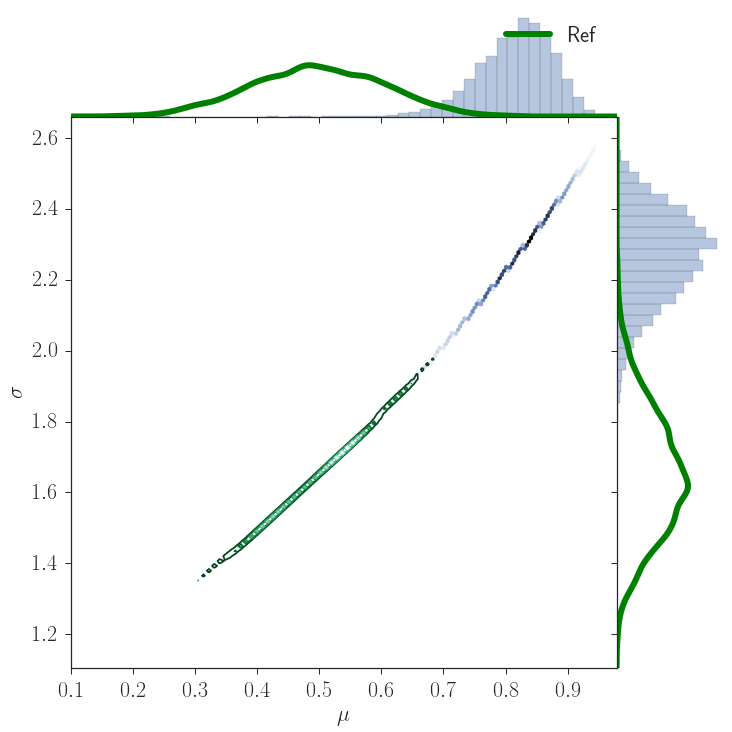

In [38]:
plotResults(S, [])

In [31]:
L=[]
for element in samples:
    if element > 0.7:
        L.append(element)
print len(L)
print len(samples)


1502
20001


###with sigma equal to gamma constant

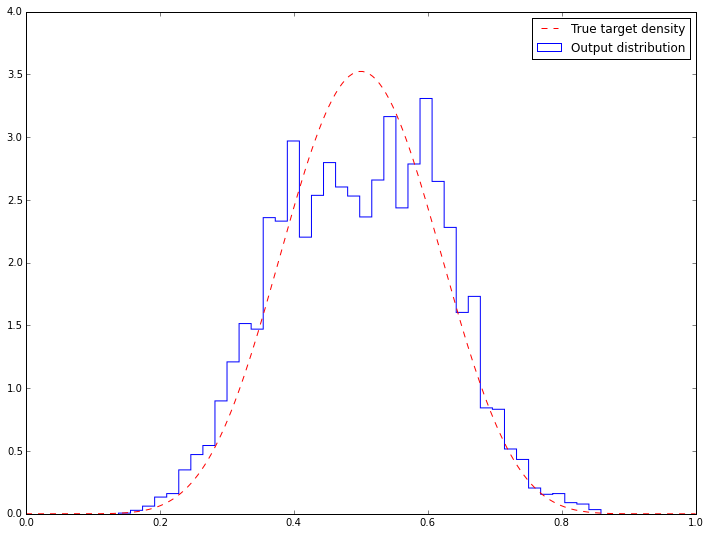

In [14]:
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Output distribution');
plt.plot(thetas, target.pdf(thetas), c='red', linestyle='--', label='True target density')
plt.xlim([0,1]);
plt.legend(loc='best');

In [33]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
naccept = 0
theta = 0.1
niters = 20000

delta = 0.01
gamma = 0.01


samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_1 = theta
    theta_2 = theta_1 + delta
    gradU = -(target.pdf(theta_2) - target.pdf(theta_1))/delta
    theta_p = theta +gamma*gradU + st.norm(0, sigma).rvs()
    rho = min(1, target.pdf(theta_p)*st.norm(0,sigma).pdf(theta)/[st.norm(0,sigma).pdf(theta_p)*target.pdf(theta)])
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
    if np.mod(i,niters/10)==0:
        print "Iteration", i, "Acceptance", naccept/niters
nmcmc = len(samples)//2
print "Iteration", niters, "Acceptance", naccept/niters

Iteration 0 Acceptance 5e-05
Iteration 2000 Acceptance 0.03395
Iteration 4000 Acceptance 0.06855
Iteration 6000 Acceptance 0.1028
Iteration 8000 Acceptance 0.1377
Iteration 10000 Acceptance 0.17085
Iteration 12000 Acceptance 0.20535
Iteration 14000 Acceptance 0.24005
Iteration 16000 Acceptance 0.274
Iteration 18000 Acceptance 0.31
Iteration 20000 Acceptance 0.34435


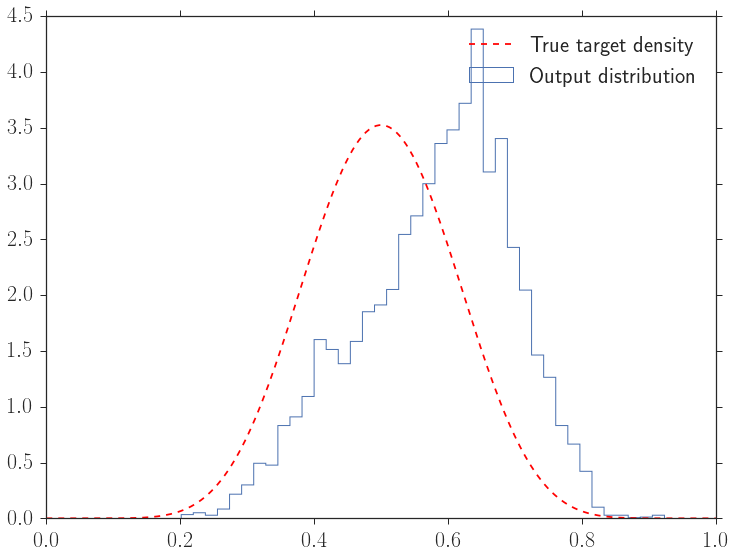

In [34]:
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Output distribution');
plt.plot(thetas, target.pdf(thetas), c='red', linestyle='--', label='True target density')
plt.xlim([0,1]);
plt.legend(loc='best');

#Generic functions

In [15]:
def mh_chain(niters, theta, target, sigma):
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + st.norm(0, sigma).rvs()
        rho = min(1, target.pdf(theta_p)/target.pdf(theta))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
            samples.append(theta)
    return samples

In [16]:
def mala_chain(niters, theta, target, sigma):
    samples = [theta]
    gamma = 0.01
    delta = 0.01
    while len(samples) < niters:
        theta_1 = theta
        theta_2 = theta_1 + delta
        gradU = -(target.pdf(theta_2) - target.pdf(theta_1))/delta
        theta_p = theta +gamma*gradU + st.norm(0, sigma).rvs()
        rho = min(1, target.pdf(theta_p)*st.norm(0, sigma).pdf(theta)/[st.norm(0, sigma).pdf(theta_p)*target.pdf(theta)])
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
            samples.append(theta)
    return samples

In [17]:
def mala_fim_chain(niters, theta, target, sigma):
    samples = [theta]
    delta = 0.01
    while len(samples) < niters:
        theta_1 = theta
        theta_2 = theta_1 + delta
        gradU = -(target.pdf(theta_2) - target.pdf(theta_1))/delta
        fim = (np.log(target.pdf(theta_2)) - np.log(target.pdf(theta_1)))/delta
        gamma = 1/fim
        drift = 1/(np.log(target.pdf(theta_2)) - np.log(target.pdf(theta_1)))
        theta_p = theta +gamma*gradU + drift + st.norm(0, sigma).rvs()
        rho = min(1, target.pdf(theta_p)*st.norm(0, sigma).pdf(theta)/[st.norm(0, sigma).pdf(theta_p)*target.pdf(theta)])
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
            samples.append(theta)
    return samples

In [18]:
def ula_chain(niters, theta, target, sigma,gamma):
    samples = [theta]
    delta = 0.01
    while len(samples) < niters:
        theta_1 = theta
        theta_2 = theta_1 + delta
        gradU = -(target.pdf(theta_2) - target.pdf(theta_1))/delta
        theta_p = theta +gamma*gradU + st.norm(0, sigma).rvs()
        theta = theta_p
        samples.append(theta)
    return samples

#Compare MH and MALA

In [9]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
gamma = 0.001
sigma2 = 0.03
niters = 100
theta = 0.1
samples = mh_chain(niters, theta, target, sigma)

First run

In [22]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
gamma = 0.001
sigma2 = 0.03
niters = 1000

samples_mh = [mh_chain(niters, theta, target, sigma) for theta in np.arange(0.1, 4, 1)]
samples_mala = [mala_chain(niters, theta, target, sigma) for theta in np.arange(0.1, 4, 1)]

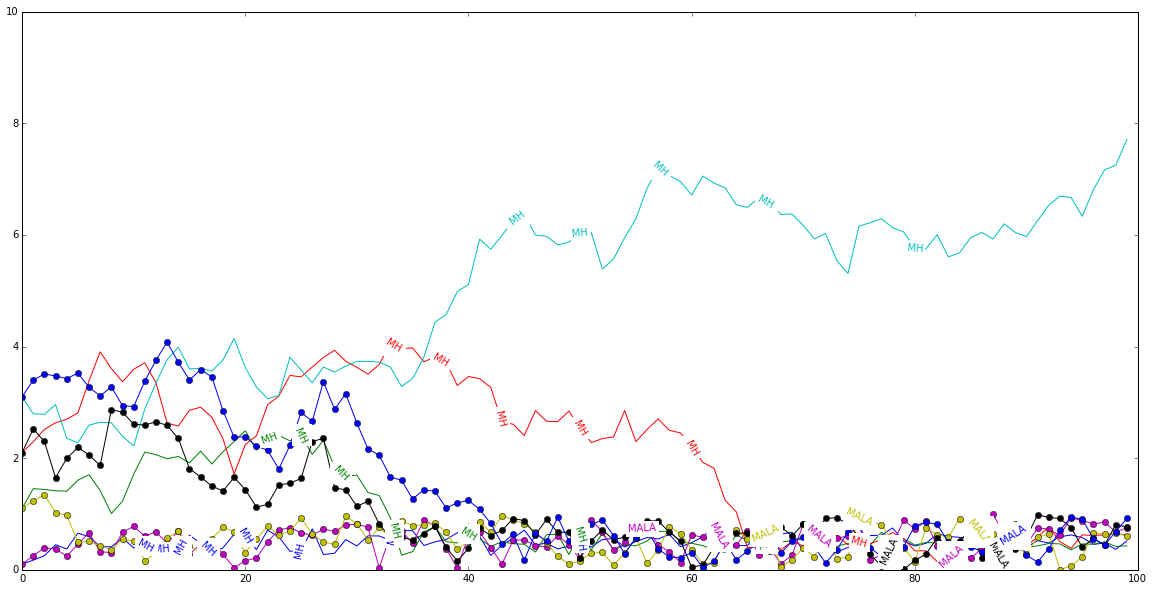

In [17]:
plt.figure(figsize=(20,10))
for samples in samples_mh:
    plt.plot(samples, '-',label=str('MH'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
for samples in samples_mala:
    plt.plot(samples, '-o',label=str('MALA'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, niters])
plt.ylim([0, 10]);

The yellow and blue chain are converging faster, the purple one is converging at the same rate.
The black chain is not even converging (while the red one (reference MH) is)

###Second run

In [99]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
sigma2 = 0.03
niters = 100

samples_mh = [mh_chain(niters, theta, target, sigma) for theta in np.arange(0.1, 4, 1)]
samples_mala = [mala_chain(niters, theta, target, sigma) for theta in np.arange(0.1, 4, 1)]

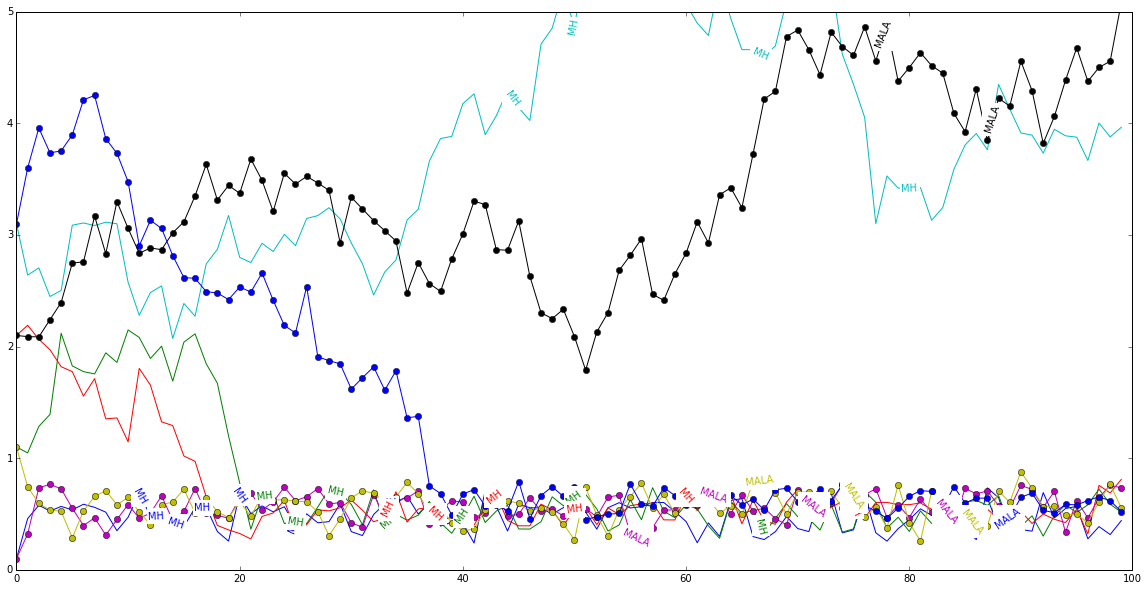

In [100]:
plt.figure(figsize=(20,10))
for samples in samples_mh:
    plt.plot(samples, '-',label=str('MH'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
for samples in samples_mala:
    plt.plot(samples, '-o',label=str('MALA'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, niters])
plt.ylim([0, 5]);

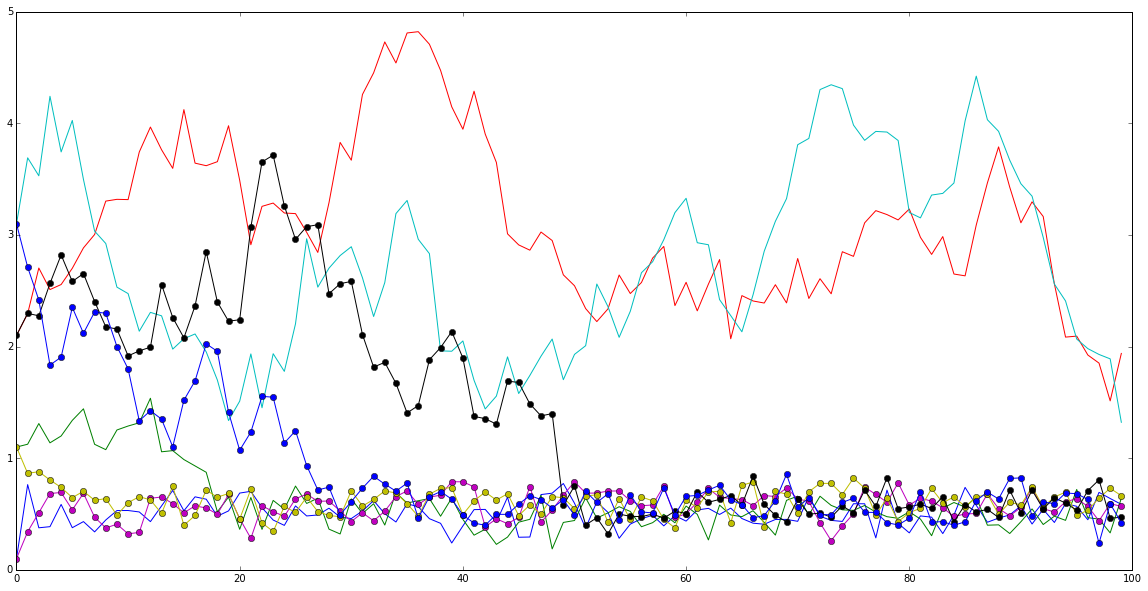

In [13]:
plt.figure(figsize=(20,10))
for samples in samples_mh:
    plt.plot(samples, '-')
for samples in samples_mala:
    plt.plot(samples, '-o')
plt.xlim([0, niters])
plt.ylim([0, 5]);

###Third run

In [19]:
niters = 1000
samples_mh2 = [mh_chain(niters, theta, target, sigma) for theta in np.arange(5, 9, 1)]
samples_mala2 = [mala_chain(niters, theta, target, sigma) for theta in np.arange(5, 9, 1)]

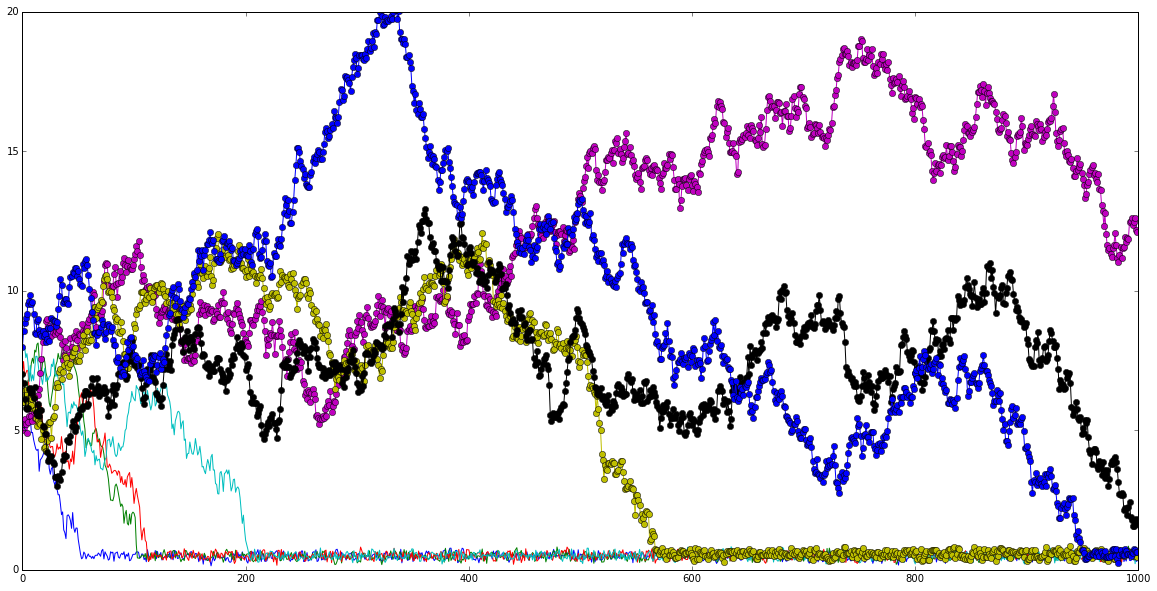

In [21]:
plt.figure(figsize=(20,10))
for samples in samples_mh2:
    plt.plot(samples, '-')
for samples in samples_mala2:
    plt.plot(samples, '-o')
plt.xlim([0, niters])
plt.ylim([0, 20]);

#ULA

In [18]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
naccept = 0
theta = 0.5
niters = 10000

delta = 0.01
gamma = 0.001


samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_1 = theta
    theta_2 = theta_1 + delta
    gradU = -(target.pdf(theta_2) - target.pdf(theta_1))/delta
    theta_p = theta +gamma*gradU + gamma*st.norm(0, 1).rvs()
    naccept += 1
    theta = theta_p
    samples[i+1] = theta
nmcmc = len(samples)//2
print naccept/niters

1.0


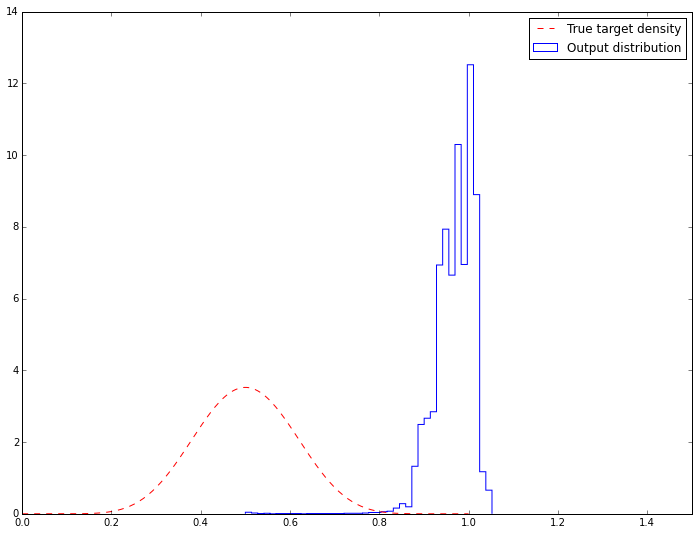

In [30]:
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[:], 40, histtype='step', normed=True, linewidth=1, label='Output distribution');
plt.plot(thetas, target.pdf(thetas), c='red', linestyle='--', label='True target density')
plt.xlim([0,1.5]);
plt.legend(loc='best');

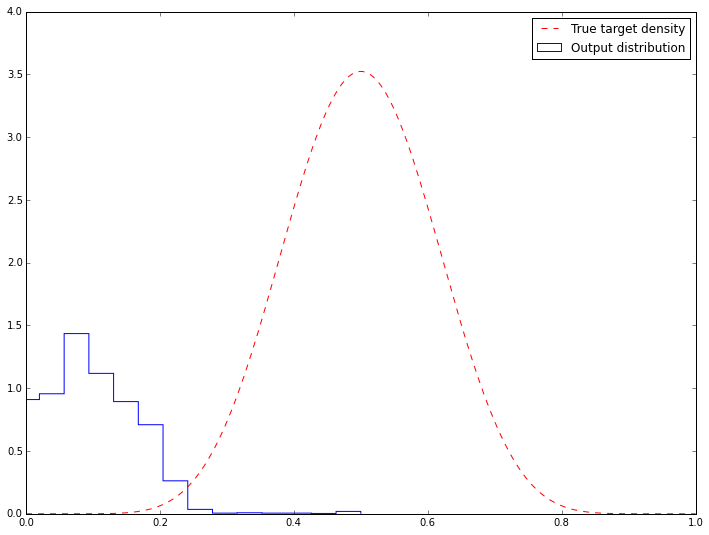

In [90]:
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[:], 40, histtype='step', normed=True, linewidth=1, label='Output distribution');
plt.plot(thetas, target.pdf(thetas), c='red', linestyle='--', label='True target density')
plt.xlim([0,1]);
plt.legend(loc='best');

In [106]:
#ULA chains
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
sigma2 = 0.03
niters = 1000
gamma = 0.01
theta = 0.1

samples_ula = [ula_chain(niters, theta, target, sigma,gamma) for theta in np.arange(0.1, 1, 0.25)]

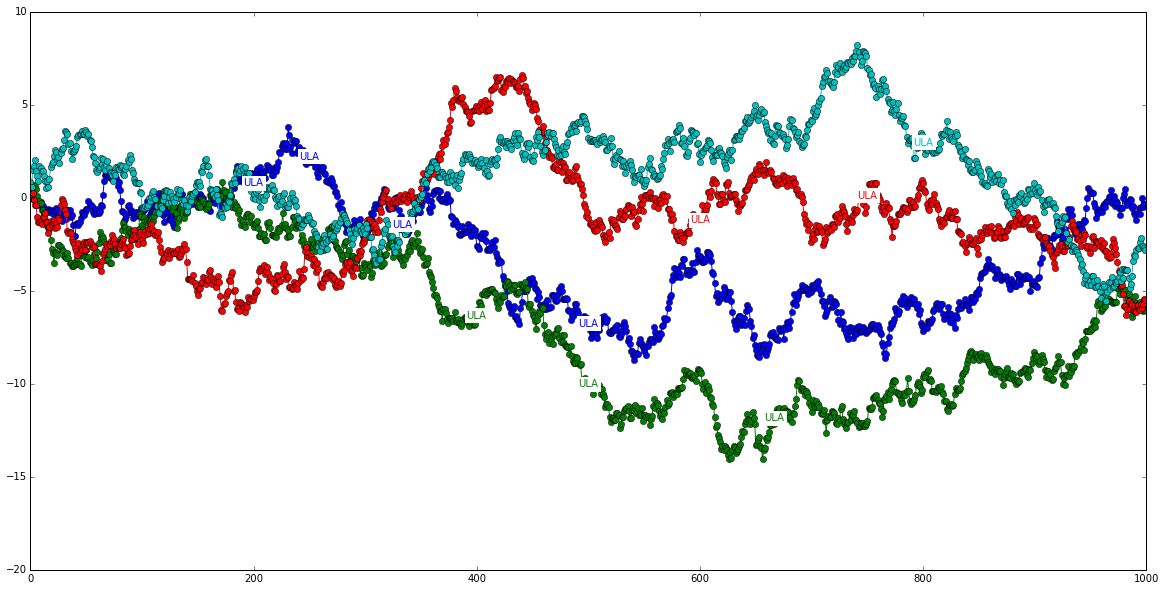

In [117]:
plt.figure(figsize=(20,10))
for samples in samples_ula:
    plt.plot(samples, '-o',label=str('ULA'))
    labelLines(plt.gca().get_lines(), align=False)
plt.xlim([0, niters])
plt.ylim([-20, 10]);

#Compare MH and ULA

In [67]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
gamma = 0.001
sigma2 = 0.03
niters = 150

samples_mh = [mh_chain(niters, theta, target, sigma) for theta in np.arange(0.1, 5, 1)]
samples_ula = [ula_chain(niters, theta, target, sigma,gamma) for theta in np.arange(0.1, 4, 1)]

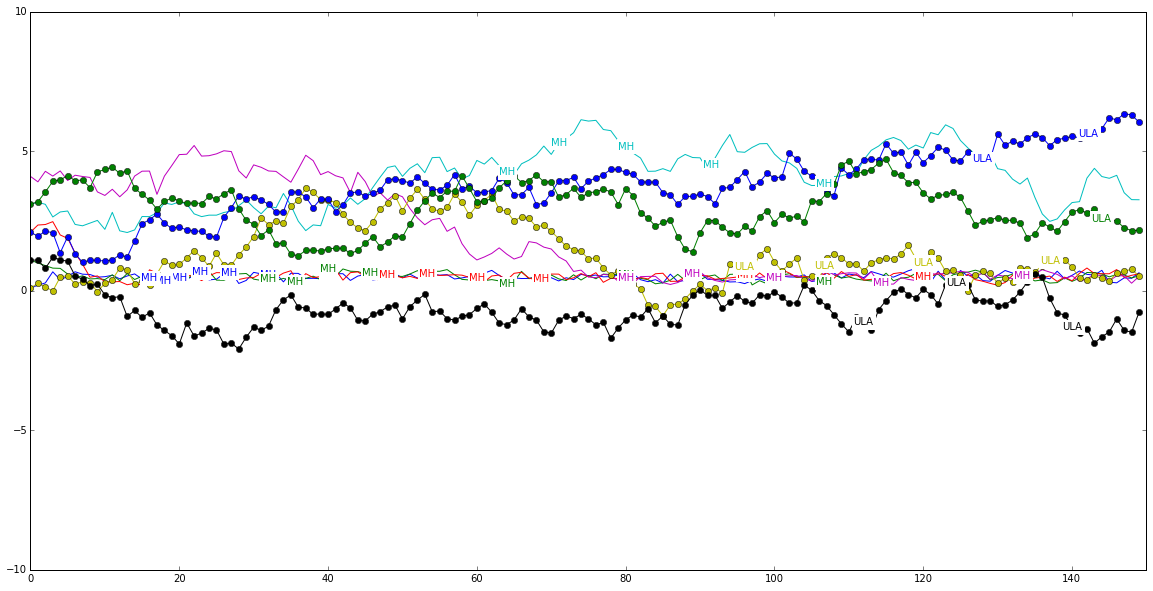

In [69]:
plt.figure(figsize=(20,10))
for samples in samples_mh:
    plt.plot(samples, '-',label=str('MH'))
    labelLines(plt.gca().get_lines(), align=False)
for samples in samples_ula:
    plt.plot(samples, '-o',label=str('ULA'))
    labelLines(plt.gca().get_lines(), align=False)
plt.xlim([0, niters])
plt.ylim([-10, 10]);

#Compare MALA gamma and MALA FIM

In [ ]:
a = 10
b = 10
target = st.beta(a, b)
sigma = 0.3
sigma2 = 0.03
niters = 100
gamma = 0.01

samples_mh = [mala2_chain(niters, theta, target, sigma, gamma) for theta in np.arange(0.1, 4, 1)]
samples_mala = [mala_fim_chain(niters, theta, target, sigma) for theta in np.arange(0.1, 4, 1)]
plt.figure(figsize=(20,10))

In [ ]:
for samples in samples_mala_gamma:
    plt.plot(samples, '-')
for samples in samples_mala_fim:
    plt.plot(samples, '-o')
plt.xlim([0, niters])
plt.ylim([0, 5]);